In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("XYZ_sales_data.csv")
df 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12-04-2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02-04-2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02-04-2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04-03-2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df=df[['Customer_Age','Product_Category']]

In [5]:
data_encoded=pd.get_dummies(df,columns=['Customer_Age','Product_Category'])

In [6]:
print(data_encoded)

        Customer_Age_17  Customer_Age_18  Customer_Age_19  Customer_Age_20  \
0                 False            False             True            False   
1                 False            False             True            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
113031            False            False            False            False   
113032            False             True            False            False   
113033            False             True            False            False   
113034            False            False            False            False   
113035            False            False            False            False   

        Customer_Age_21  Customer_Age_22  Customer_Age_23  Cust

In [10]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_encoded)

In [11]:
kmeans=KMeans(n_clusters=3)
df['Cluster']=kmeans.fit_predict(data_scaled) 

C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725997\AppData\Local\Temp\ipykernel_11812\3378547814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=kmeans.fit_predict(data_scaled)


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

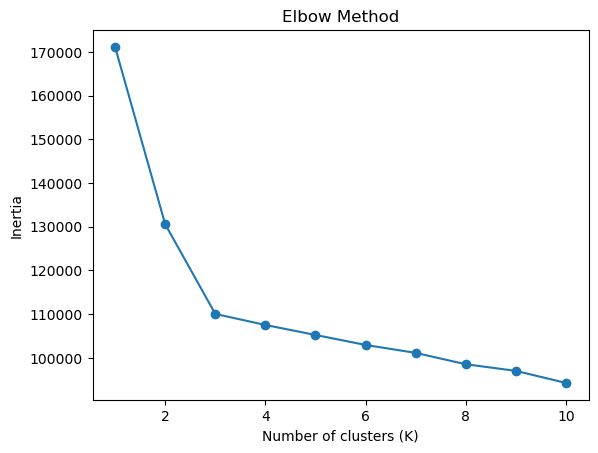

In [14]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

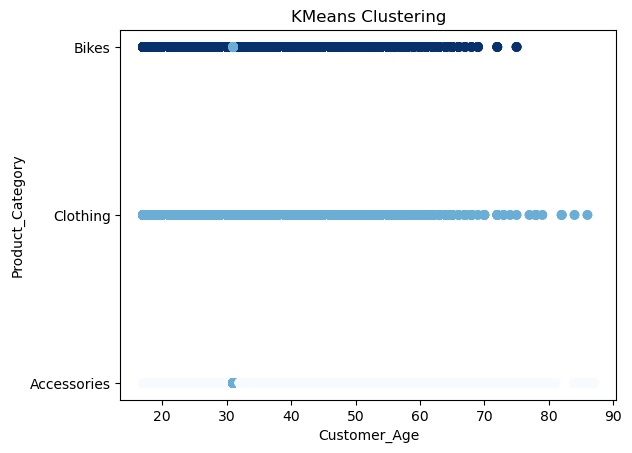

In [17]:
plt.scatter(df['Customer_Age'],df['Product_Category'],c=df['Cluster'],cmap='Blues')
plt.xlabel('Customer_Age')
plt.ylabel('Product_Category')
plt.title('KMeans Clustering')
plt.show()

In [18]:
cd=df.groupby('Cluster')
for i in cd:
    print(i)

(0,         Customer_Age Product_Category  Cluster
0                 19      Accessories        0
1                 19      Accessories        0
2                 49      Accessories        0
3                 49      Accessories        0
4                 47      Accessories        0
...              ...              ...      ...
108369            37      Accessories        0
108370            37      Accessories        0
108371            37      Accessories        0
108372            37      Accessories        0
108373            37      Accessories        0

[67558 rows x 3 columns])
(1,         Customer_Age Product_Category  Cluster
126               31      Accessories        1
127               31      Accessories        1
128               31      Accessories        1
129               31      Accessories        1
138               31      Accessories        1
...              ...              ...      ...
113031            41         Clothing        1
113032            18     